In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon
from tqdm import tqdm

In [2]:
def generate_poisson_uniform_inter_event_times(lamda, dt, N):
    last_event = 0.0
    timestep = 0
    inter_event_samples = []

    with tqdm(total=N) as progress:
        while len(inter_event_samples) < N:
            n = np.random.poisson(lamda * dt)

            unis = sorted(np.random.random(size=n))

            for u in sorted(np.random.random(size=n)):
                this_event = (timestep + u) * dt

                inter_event_samples.append(this_event - last_event)
                progress.update()

                last_event = this_event

            timestep += 1

    return inter_event_samples[:N]

In [3]:
def generate_exponential_inter_event_times(lamda, N):
    exponential_samples = []

    for _ in range(N):
        exponential_samples.append(np.random.exponential(scale=1.0/lamda))
    
    return exponential_samples

100%|██████████| 100000/100000 [18:20<00:00, 90.89it/s]


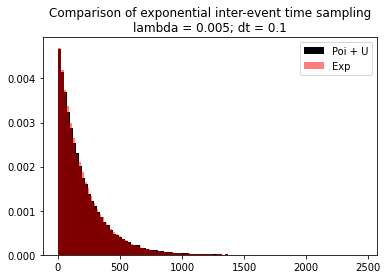

100%|██████████| 100000/100000 [01:51<00:00, 900.70it/s]


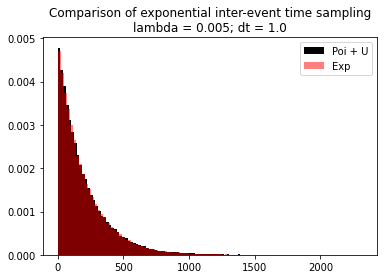

100%|██████████| 100000/100000 [00:11<00:00, 9043.35it/s]


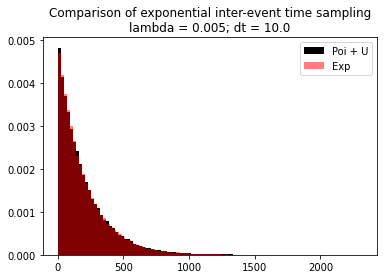

100%|██████████| 100000/100000 [00:12<00:00, 8172.15it/s]


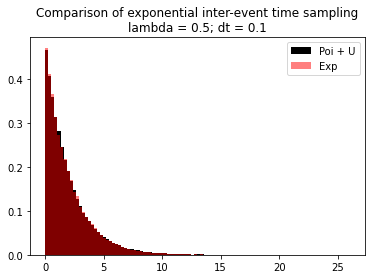

100%|██████████| 100000/100000 [00:01<00:00, 78472.09it/s]


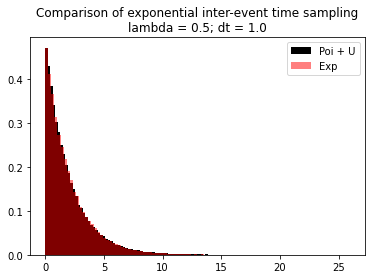

100002it [00:00, 395684.65it/s]                           


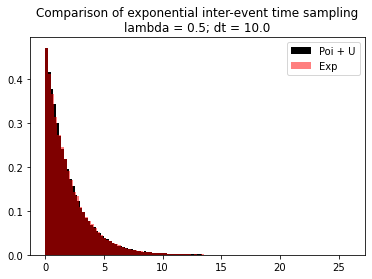

100%|██████████| 100000/100000 [00:00<00:00, 397093.49it/s]


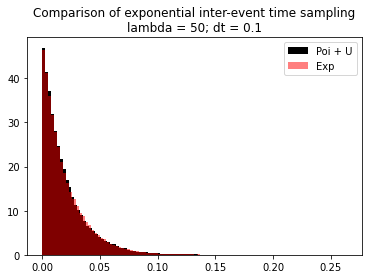

100020it [00:00, 618731.64it/s]                           


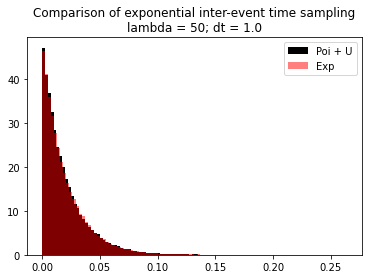

100066it [00:00, 660029.10it/s]                           


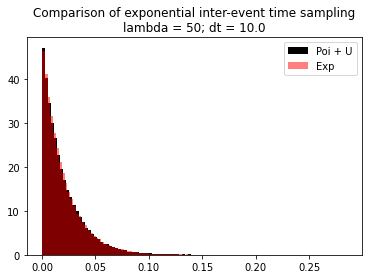

100395it [00:00, 661357.76it/s]                           


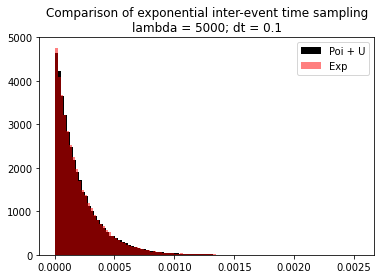

100125it [00:00, 396018.16it/s]                           


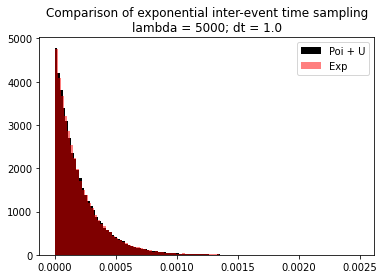

149133it [00:00, 556842.64it/s]                           


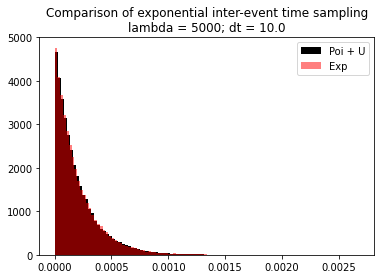

In [4]:
N = 100000

lamdas = [0.005, 0.5, 50, 5000]
dts = [0.1, 1.0, 10.0]

for lamda in lamdas:
    exponential_samples = generate_exponential_inter_event_times(lamda, N)
    
    for dt in dts:
        inter_event_samples = generate_poisson_uniform_inter_event_times(lamda, dt, N)
        
        plt.title(
            'Comparison of exponential inter-event time sampling\n'
            + f'lambda = {lamda}; dt = {dt}'
        )
        plt.hist(inter_event_samples, bins=100, density=True, color='black', label='Poi + U')
        plt.hist(exponential_samples, bins=100, density=True, alpha=0.5, color='red', label='Exp')
        plt.legend()
        plt.show()